In [1]:
import os

In [2]:
!pip install findspark
!pip install pyspark
import findspark
from pyspark.sql import SparkSession

     |████████████████████████████████| 212.3MB 85kB/s 
     |████████████████████████████████| 204kB 63.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=3246e6ec36b4839c41555903297a4ba53f5a6252f3daaca0949a86f2368038d9
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [3]:
!pip install pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import csv
from pyspark.sql.types import *
from pyspark.sql.functions import format_number, when
import pyspark.sql.functions as F

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [6]:
crime_data = pd.read_pickle('/content/Sample_Data_Proj.pkl')

In [7]:
crime_data.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
5404128,0890,FROM BUILDING,RESIDENCE,False,False,2424,24.0,49.0,1.0,06,2012,42.015517,-87.679075,7,3,12,Tuesday,THEFT,North,2327482.0
4166807,1320,TO VEHICLE,STREET,False,False,612,6.0,17.0,71.0,14,2008,41.754053,-87.659465,12,31,23,Wednesday,CRIMINAL_OFFENSE,West,1230761.0
443362,1310,TO PROPERTY,RESIDENCE,False,False,234,2.0,4.0,41.0,14,2017,41.799545,-87.588742,2,20,12,Monday,CRIMINAL_OFFENSE,East,1230761.0
3983378,0630,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,2515,25.0,37.0,19.0,05,2008,41.921231,-87.775626,9,23,12,Tuesday,THEFT,North,2327482.0
2065057,0460,SIMPLE,CHA APARTMENT,False,False,212,2.0,4.0,35.0,08B,2003,41.824825,-87.613636,10,14,16,Tuesday,NON-CRIMINAL_ASSAULT,East,1640154.0


In [8]:
crime_data.columns

Index(['IUCR', 'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Year',
       'Latitude', 'Longitude', 'Month', 'Day_num', 'Time', 'day_of_week',
       'primary_type_grouped', 'zone', 'Count_CrimeType_Column'],
      dtype='object')

In [9]:
primaryVisualizeDF = crime_data.groupby('primary_type_grouped').size()

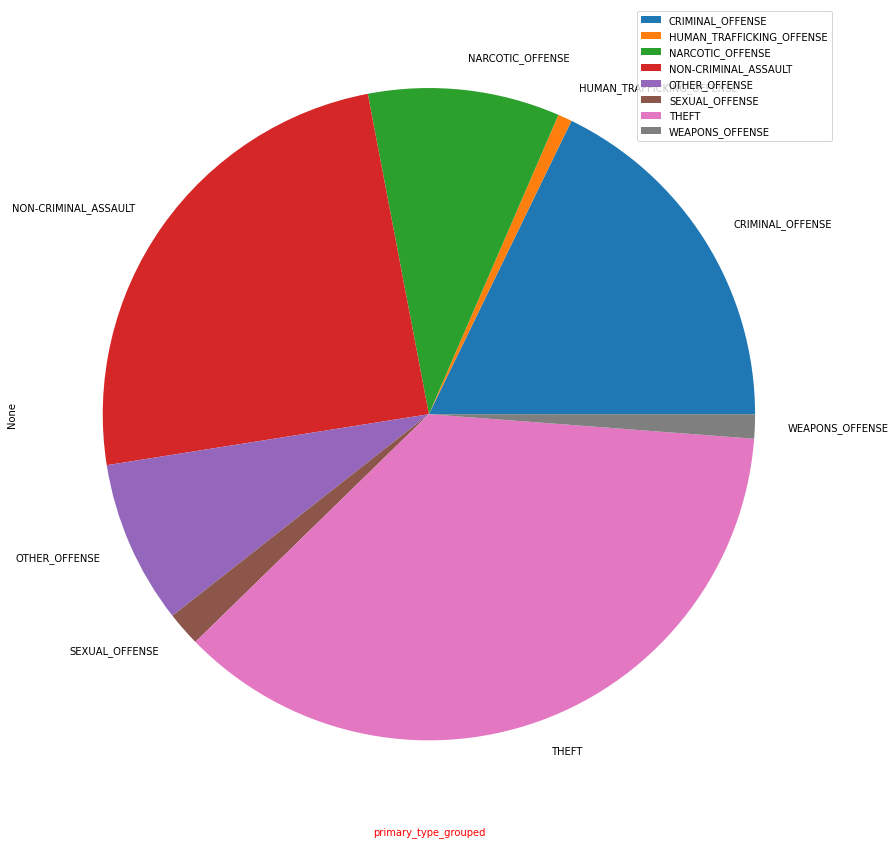

In [10]:
primaryVisualizeDF.plot.pie(figsize = (15,15))
plt.xlabel('primary_type_grouped', fontsize=10, color = 'red')
plt.legend()

In [11]:
data = crime_data.replace(to_replace='None', value=np.nan).dropna()

In [12]:
# create an instance of label encoder for categorical variables
labelEncoder = LabelEncoder()

In [13]:
primaryEncoded = labelEncoder.fit_transform(data['District'])
primaryEncoded

array([20,  5,  1, 21,  1, 11, 20,  8, 11, 10, 11,  3,  3,  7,  2,  0,  1,
       10,  2, 19, 15,  5,  5, 10, 10,  5,  3,  1,  3,  5, 13, 16, 10, 14,
       11, 14,  3,  3,  5,  9,  7, 18,  7,  7, 10,  8,  2,  6,  1, 16,  3,
        3,  2,  2, 20,  7, 13, 11,  2,  8, 15, 17, 11, 19, 18, 10,  6,  5,
       17,  6,  2,  5, 14, 16, 12, 21,  9, 15, 14,  2, 10,  2, 21, 10,  6,
       17,  8, 13, 13, 15, 18, 11,  9,  1, 13,  5,  0,  3, 13,  4,  0,  1,
        2,  6, 12,  3,  0,  3, 20,  7, 16,  5, 10,  2, 10, 15,  5, 17, 12,
       14,  2, 21,  3,  1,  7, 21, 15, 11, 12,  2, 13, 11, 10,  7,  7, 12,
        9,  8,  0,  3,  8,  6, 18,  0, 13, 11, 15,  4,  0,  7,  1,  6, 11,
       12,  5,  6, 13, 17, 19, 15, 14,  3, 20, 14,  3, 19, 11,  5,  6, 11,
        0,  4,  8, 10, 16, 16, 16,  5, 13,  7, 11,  1, 13,  3,  4,  5,  2,
        2,  2,  8,  1, 21, 17, 17,  3, 16, 12,  6, 17,  4, 13, 19,  9, 11,
       12, 16,  5, 20, 11,  6,  6, 10, 19, 20, 20,  7, 12,  9, 10,  4,  1,
        6, 21, 10, 11, 17

In [14]:
data['District'] = primaryEncoded

In [15]:
# create an instance of label encoder for categorical variables
labelEncoder2 = LabelEncoder()

In [55]:
locDiscEncoded = labelEncoder2.fit_transform(data['IUCR'])
locDiscEncoded

array([ 40,  65,  64,  28,  13,   2,  65,  37,  17,   4,  65,  55,  27,
        42,  46,  13,  42, 102,  27,  13, 100, 100,  13,  17,  13,  42,
        31,  37,  85,  64,  93, 100,  67,  65,  31,  40,   3,  17,  31,
        17, 113,  42,  12,  31,  24,  13,  37,  23,  64,  31,  26,  27,
        32,  17,  64,  40,  26,  64,   5,  85,  56,  31,  30,  31,  32,
         3,  79,  85,  31,  17,  27,  37,  64,  30,  64,  68,  17,  31,
       117,  19,  85,  64,  65,  85,  26,  37,  39,  45,  13,  18, 100,
        42, 110,  30,  94,  40,  40,  26, 100,  17,  13,  31,  64,  45,
        26,  26,  30,  13,  64,   2,  65,  17,  26, 100,  65,  41,  30,
       101,  42,  30, 103,  31,  26,  17,  17,  43,  64,  26,  31,  64,
        13,  65,  91,  42,  42,  31,  31,  47,  55,  64,  37,  16,  64,
        56,  64,  17,  31, 100, 105,  30,  31,   3,  17, 100,  42,  42,
         8,  40,  17,  40,  42,  84,  65,  25,  26,  43,  13,  17,  30,
        25,  58,  31,  13,  65,   3,  55,  40,  26, 116,  30,  2

In [56]:
data['IUCR'] = locDiscEncoded

In [18]:
# create an instance of label encoder for categorical variables
labelEncoder3 = LabelEncoder()

In [19]:
communityEncoded = labelEncoder3.fit_transform(data['Community Area'])
communityEncoded

array([ 0, 67, 38, 16, 32, 21,  1, 57, 20, 23, 25, 40, 42, 58, 40, 30, 35,
       23, 39, 45, 14, 65, 41, 24, 23, 41, 42, 38, 42, 41, 22,  7, 23, 13,
       28, 13, 44, 47, 65, 27, 52,  3, 59, 61, 26, 54, 40, 64, 35,  7, 42,
       51, 40, 40,  1, 62, 22, 28, 40, 57, 14,  5, 25, 68,  1, 22, 64, 41,
        5, 64, 65, 41, 13,  7, 19, 16, 26, 12, 72, 39, 23, 65, 16, 20, 64,
        2, 34, 22, 22, 14, 73, 25, 26, 32, 22, 67, 29, 42, 22, 45, 29, 36,
       65, 65, 18, 42, 29, 42, 73, 62,  7, 67, 24, 65, 20, 11, 41,  3, 19,
       15, 65, 16, 42, 37, 59, 22, 12, 25, 21, 65, 22, 24, 20, 62, 62, 18,
       27, 59, 25, 40, 57, 64,  2, 29, 22, 21, 12, 45, 25, 52, 32, 64, 21,
       18, 67, 64, 22,  2, 67, 12,  8, 47,  1, 13, 42, 67, 25, 41, 63, 24,
       29, 49, 57, 24,  7,  7,  7, 41, 22, 52, 28, 35, 22, 42, 49, 67, 40,
       40, 65, 31, 35, 17,  5,  4, 40,  7, 19, 64,  5, 49, 22, 69, 27, 25,
       19,  7, 67,  0, 21, 64, 63, 26, 67,  1,  0, 66, 18, 27, 24, 49, 35,
       63, 22, 20, 25,  2

In [20]:
data['Community Area'] = locDiscEncoded

In [21]:
# create an instance of label encoder for categorical variables
labelEncoder4 = LabelEncoder()

In [22]:
latitudeEncoded = labelEncoder4.fit_transform(data['Latitude'])
latitudeEncoded

array([987, 177, 393, 802, 451, 675, 970, 419, 681, 617, 578, 202, 117,
       384, 233, 495, 450, 576, 324,  27, 891, 162, 137, 568, 571, 135,
       163, 407, 114, 136, 589, 750, 580, 872, 507, 884,  86,  66, 190,
       489, 391, 923, 359, 254, 541, 420, 243, 266, 436, 663, 169,   3,
       225, 236, 979, 301, 684, 504, 217, 418, 874, 844, 540,  90, 968,
       643, 256, 158, 856, 271, 298, 113, 883, 752, 779, 795, 517, 908,
       935, 282, 645, 251, 847, 661, 265, 903, 427, 650, 595, 868, 950,
       633, 506, 449, 711, 161, 610, 120, 715,  40, 535, 435, 287, 263,
       845,  99, 574,  92, 965, 218, 704, 129, 621, 220, 708, 964, 106,
       901, 828, 890, 269, 834,  97, 400, 365, 768, 916, 508, 724, 239,
       622, 624, 670, 313, 230, 850, 480, 371, 598, 184, 430, 203, 929,
       642, 719, 672, 920,  48, 582, 361, 467, 366, 706, 849, 119, 314,
       596, 914,  98, 911, 943,  47, 960, 871, 131, 100, 509, 107, 336,
       623, 542,  15, 388, 553, 722, 733, 699, 130, 586, 392, 50

In [23]:
data['Latitude'] = locDiscEncoded

In [24]:
# create an instance of label encoder for categorical variables
labelEncoder5 = LabelEncoder()

In [25]:
longitudeEncoded = labelEncoder5.fit_transform(data['Longitude'])
longitudeEncoded

array([416, 531, 901,  33, 838, 377, 395, 485, 289, 215, 583, 905, 935,
       202, 956, 776, 828, 170, 890, 686, 227, 859, 850, 330, 147, 819,
       965, 902, 977, 723, 120, 666, 151,  52, 550,  55, 906, 937, 740,
       221, 110, 426, 366, 239, 304, 392, 931, 680, 796, 704, 986, 988,
       914, 920, 302, 311,  61, 510, 927, 526, 312, 513, 618, 430, 338,
       130, 619, 871, 487, 679, 827, 873,  99, 700, 251,  62, 269, 316,
         3, 865, 184, 813, 119, 249, 636, 552, 707,  39,  97, 162, 549,
       594, 263, 800, 105, 497, 722, 928,  41, 754, 756, 895, 789, 706,
       308, 966, 759, 978, 520, 415, 809, 650, 264, 835, 205, 243, 772,
       391, 288,  23, 832,  69, 987, 802, 321, 123, 206, 534, 452, 833,
        51, 346, 254, 319, 372, 291, 341, 329, 663, 955, 433, 600, 529,
       757,  98, 553, 230, 779, 672, 132, 780, 629, 374, 322, 451, 703,
       107, 597, 605, 140,  14, 963, 427,  68, 934, 644, 525, 874, 489,
       333, 760, 807, 576, 279, 748, 725, 733, 866,  79,  44, 38

In [26]:
data['Longitude'] = locDiscEncoded

In [27]:
# create an instance of label encoder for categorical variables
labelEncoder6 = LabelEncoder()

In [28]:
monthEncoded = labelEncoder6.fit_transform(data['Month'])
monthEncoded

array([ 6, 11,  1,  8,  9,  1,  6,  7,  9,  6, 10,  6,  2,  0,  1,  9,  7,
       10, 11,  4, 10,  5,  6,  3,  3,  8,  8,  1,  4,  4,  1, 11, 10,  0,
        5,  2,  8,  0, 11,  1,  2, 10, 11,  3,  4,  6,  6, 10,  6, 11,  8,
        3,  1,  3,  9,  5,  3,  4,  5,  7,  1,  4,  6, 10,  4,  9,  6,  5,
        6,  8,  9,  5,  7,  7,  0,  6,  2,  9,  2,  7,  8,  0,  8,  1, 10,
        0, 10,  6, 10, 11,  6, 11,  9,  9,  2,  8,  3,  9,  8,  2, 11,  2,
        4,  3,  3,  8,  4,  9,  3,  5,  1,  9,  8,  9,  2,  7,  9,  5,  3,
        3,  3,  4,  2,  7,  1,  6,  2,  5, 11,  3,  4,  8, 11, 10,  3,  6,
        6,  7,  0,  3,  9,  9,  5,  0,  0,  6,  6,  7,  7,  4,  1,  0,  9,
        6,  0,  1,  5,  9,  9,  1,  7, 11,  0,  7,  7,  6,  4,  8,  7,  9,
        9, 11,  1,  1,  7,  8,  8,  7, 10,  5,  6,  6,  7,  3, 10,  4,  0,
        7,  1, 10,  5,  9,  6, 11,  8, 11,  8,  4,  4,  4, 11, 10, 11,  0,
        9,  1,  8,  8, 10,  5,  2,  5,  5,  7,  1, 11,  6, 10,  4,  8,  5,
        8,  5,  4,  6,  6

In [29]:
data['Month'] = locDiscEncoded

In [30]:
# create an instance of label encoder for categorical variables
labelEncoder7 = LabelEncoder()

In [31]:
yearEncoded = labelEncoder7.fit_transform(data['Year'])
yearEncoded

array([11,  7, 16,  7,  2,  5,  6,  2,  3,  3,  7,  8, 15,  3,  6,  8, 10,
       12,  4, 17,  1,  1, 15, 17,  8,  2, 17,  4, 13,  6,  5,  3,  9,  3,
       18, 10, 13, 17,  7,  6, 17,  8,  8,  1, 13,  6,  2,  4,  1,  1,  4,
       17,  9, 10,  3, 15, 17,  8, 11,  3, 18, 10, 12, 18,  3, 12,  8,  4,
       15,  5, 13,  4,  2, 17, 15, 17, 18, 15, 14, 18, 11,  3,  1,  9,  6,
       14, 11,  6, 12,  9, 17,  5, 15, 11,  5,  2, 13,  1,  2,  3, 10,  8,
       11,  5,  3,  3,  9,  2,  9, 10,  5, 19,  8, 12, 14,  2, 10, 17,  3,
        5,  1,  2, 13,  5,  9,  2, 17,  5,  2, 15,  6,  3, 13,  9, 12,  9,
       16, 11, 16,  8,  3,  3,  6,  8, 16,  5,  9, 11,  8,  8, 19, 10,  2,
        1,  6, 10, 15, 18,  6,  6, 18, 18, 15,  5, 15,  4,  4,  9,  6, 19,
       19, 18,  3,  2, 18, 15, 16,  2,  2, 18, 14, 19,  8,  6,  2,  5, 20,
       19, 19,  6, 13, 18, 16,  1,  1, 10,  7, 12,  7, 12, 18,  4, 17,  6,
       12, 11,  2,  6,  7, 13, 14, 11,  9, 11,  5,  1, 17,  1, 17,  3, 19,
        9,  1,  7,  7, 15

In [32]:
data['Year'] = locDiscEncoded

In [33]:
# create an instance of label encoder for categorical variables
labelEncoder8 = LabelEncoder()

In [34]:
timeEncoded = labelEncoder8.fit_transform(data['Time'])
timeEncoded

array([12, 23, 12, 12, 16, 17, 14, 16, 22,  1, 14, 22, 21, 18, 20, 21,  2,
       16, 15, 18,  6, 21,  9, 11,  2,  1, 13,  9, 20, 18, 11, 17,  1,  0,
       15, 14,  4, 15,  0, 13, 12, 14, 14,  0, 16,  1, 13, 15,  3, 12,  7,
        8, 18, 18, 19, 15, 17, 14, 18, 11, 21, 12, 11, 19, 11, 11,  1, 22,
       17,  9, 12, 22, 23, 13,  3, 17, 17,  6,  7, 20, 18, 15,  1, 22, 15,
       22,  1, 20, 23, 12, 14,  6, 20, 12, 15, 23,  6, 18, 19, 22, 11,  0,
       20, 19, 10,  1,  8, 12,  0, 11,  8, 23,  9, 18, 20, 23, 10,  0, 19,
       23, 13, 11, 18,  3, 23, 11, 20, 14, 19, 12, 18, 19,  7,  9, 11, 10,
       19, 15, 14, 14, 14,  8, 16, 19, 20,  1, 11, 20, 12, 15, 16, 14, 18,
       20,  9, 16, 18, 19, 17, 17,  7, 19, 11, 19, 21,  0, 20, 14,  0, 22,
        0, 14, 15,  1,  1,  3, 10,  3, 17,  8, 14, 13, 21, 12, 14, 21,  1,
       14, 15, 15, 16, 20,  2,  0,  8, 10, 13, 17, 15, 18, 15, 15, 10, 22,
       19, 17,  8, 23, 19, 20,  3, 18,  1, 18, 14, 12, 18, 18,  2, 21, 15,
       11, 16, 22, 15, 16

In [35]:
data['Time'] = locDiscEncoded

In [36]:
# create an instance of label encoder for categorical variables
labelEncoder9 = LabelEncoder()

In [37]:
zoneEncoded = labelEncoder9.fit_transform(data['zone'])
zoneEncoded

array([1, 3, 0, 1, 0, 1, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 1, 0,
       2, 2, 3, 2, 2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3,
       2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 1, 3,
       2, 2, 3, 2, 2, 2, 3, 1, 1, 3, 2, 1, 3, 0, 3, 0, 1, 1, 2, 1, 3, 3,
       3, 3, 1, 1, 3, 0, 3, 2, 2, 2, 1, 3, 0, 2, 2, 3, 1, 0, 2, 2, 1, 2,
       1, 3, 3, 2, 1, 1, 2, 1, 3, 3, 2, 1, 2, 2, 3, 1, 3, 2, 3, 0, 1, 3,
       1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 1, 2, 2, 2, 2, 2, 3, 1,
       2, 2, 3, 1, 2, 1, 1, 2, 3, 1, 2, 2, 3, 2, 2, 3, 2, 0, 2, 3, 0, 3,
       1, 2, 3, 2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 3, 2,
       1, 2, 1, 2, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 2, 1, 3, 2, 3, 3, 3, 2,
       2, 3, 1, 1, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 1, 3, 0, 1, 2, 1, 2, 2,
       1, 3, 2, 1, 3, 2, 2, 3, 1, 0, 1, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2,
       1, 2, 2, 2, 3, 3, 2, 2, 3, 1, 1, 1, 0, 3, 1, 2, 2, 2, 2, 1, 2, 3,
       3, 2, 1, 2, 1, 3, 3, 3, 3, 1, 0, 1, 2, 2, 3,

In [38]:
data['zone'] = locDiscEncoded

In [39]:
# create an instance of label encoder for categorical variables
labelEncoder10 = LabelEncoder()

In [40]:
locationDescriptionEncoded = labelEncoder10.fit_transform(data['Location Description'])
locationDescriptionEncoded

array([45, 56, 45,  7, 14, 39, 54, 55,  7, 42, 56, 11, 45, 42, 56, 39, 39,
       45,  7, 59,  7, 56,  7,  7, 56, 56, 42, 32, 54, 45, 54, 14, 56, 60,
       45, 17, 56, 45, 39,  7, 49, 56, 52, 56, 54, 54, 55, 52,  7, 56,  7,
       45, 45,  6, 45,  7, 55, 55, 56, 56, 45,  7, 42, 56, 45, 54,  7, 54,
       56,  7,  7, 27, 45, 56,  7, 35, 56, 40,  3,  5, 54,  7, 56, 45,  7,
       27, 56, 56, 54, 45,  7, 56, 56, 52, 54, 50, 39, 61, 45, 45, 23, 28,
        7, 42, 45, 52, 56, 52, 18, 56, 42, 45,  7, 45, 56, 39, 17, 36, 56,
       60, 45, 56, 45,  7, 45, 42, 32, 19, 39, 39, 54, 56, 39, 56, 56, 42,
       56,  5, 56, 45, 55, 52,  7, 11, 27,  7, 56, 45, 56,  4, 56, 30,  7,
       45, 56, 56, 54, 29, 45,  8, 50, 56, 56, 28, 48, 49, 12, 54, 56,  7,
       45, 45, 56, 49, 56, 56, 50,  7, 58, 39,  7,  7, 24, 56, 52, 56,  7,
       41, 60, 56, 34, 56, 54,  7, 47, 23,  7, 54, 18, 56, 47, 52, 17, 56,
        7, 27, 42, 56, 50, 45, 54, 55,  7, 56, 56, 30, 56, 42,  7, 56, 46,
       30,  5,  7, 54, 27

In [41]:
data['Location Description'] = locDiscEncoded

In [42]:
# create an instance of label encoder for categorical variables
labelEncoder11 = LabelEncoder()

In [57]:
fbiEncoded = labelEncoder11.fit_transform(data['FBI Code'])
fbiEncoded

array([ 5, 12, 12,  4,  8,  1, 12,  5,  8,  1, 12, 11,  4,  6,  6,  8,  6,
       21,  4,  8, 21, 21,  8,  8,  8,  6,  5,  5, 16, 12, 16, 21, 12, 12,
        5,  5,  1,  8,  5,  8, 21,  6,  8,  5,  7,  8,  5,  7, 12,  5,  4,
        4,  5,  8, 12,  5,  4, 12,  1, 16, 11,  5,  5,  5,  5,  1, 15, 16,
        5,  8,  4,  5, 12,  5, 12, 12,  8,  5, 21,  3, 16, 12, 12, 16,  4,
        5,  5,  6,  8,  3, 21,  6, 20,  5, 21,  5,  5,  4, 21,  8,  8,  5,
       12,  6,  4,  4,  5,  8, 12,  1, 12,  8,  4, 21, 12,  5,  5, 21,  6,
        5, 15,  5,  4,  8,  8,  6, 12,  4,  5, 12,  8, 12, 16,  6,  6,  5,
        5,  6, 11, 12,  5,  8, 12, 11, 12,  8,  5, 21, 21,  5,  5,  1,  8,
       21,  6,  6,  3,  5,  8,  5,  6, 18, 12,  7,  4,  6,  8,  8,  5,  7,
       11,  5,  8, 12,  1, 11,  5,  4, 21,  5,  4,  5,  5, 13,  3,  6,  8,
       21,  5, 12, 21,  8,  8,  4, 12, 11,  8, 16, 21, 14,  5,  8,  3, 16,
       11,  5,  6, 13, 11,  8, 13,  1,  8,  5, 16,  6,  5, 21,  8,  6,  4,
        8,  7,  8,  7,  5

In [58]:
data['FBI Code'] = locDiscEncoded

In [59]:
from sklearn.decomposition import PCA #use PCA to combine features

In [60]:
location = data[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)

In [61]:
loc = pca.fit_transform(location)

In [62]:
data['Location'] = loc

In [63]:
data.head(5)

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column,Location
5404128,40,FROM BUILDING,48,False,False,48,20,48,48,40,48,48,48,48,3,48,Tuesday,THEFT,48,2327482.0,37.864154
4166807,65,TO VEHICLE,16,False,False,16,5,16,16,65,16,16,16,16,31,16,Wednesday,CRIMINAL_OFFENSE,16,1230761.0,-7.390680
443362,64,TO PROPERTY,3,False,False,3,1,3,3,64,3,3,3,3,20,3,Monday,CRIMINAL_OFFENSE,3,1230761.0,-25.775456
3983378,28,ATTEMPT FORCIBLE ENTRY,36,False,False,36,21,36,36,28,36,36,36,36,23,36,Tuesday,THEFT,36,2327482.0,20.893591
2065057,13,SIMPLE,3,False,False,3,1,3,3,13,3,3,3,3,14,3,Tuesday,NON-CRIMINAL_ASSAULT,3,1640154.0,-25.775456


In [64]:
#taking a fraction of data
data_sample = data.sample(frac=0.1, random_state=123)

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [66]:
corelation = data.corr()
corelation

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,zone,Count_CrimeType_Column,Location
IUCR,1.000000,0.026799,0.369728,-0.169920,0.026799,0.019146,0.026799,0.026799,1.000000,0.026799,0.026799,0.026799,0.026799,-0.049275,0.026799,0.026799,-0.732864,0.026799
Location Description,0.026799,1.000000,0.008798,-0.087474,1.000000,0.718790,1.000000,1.000000,0.026799,1.000000,1.000000,1.000000,1.000000,0.038614,1.000000,1.000000,0.022619,1.000000
Arrest,0.369728,0.008798,1.000000,-0.073106,0.008798,0.017776,0.008798,0.008798,0.369728,0.008798,0.008798,0.008798,0.008798,-0.046584,0.008798,0.008798,-0.431669,0.008798
Domestic,-0.169920,-0.087474,-0.073106,1.000000,-0.087474,-0.061201,-0.087474,-0.087474,-0.169920,-0.087474,-0.087474,-0.087474,-0.087474,-0.024921,-0.087474,-0.087474,-0.074358,-0.087474
Beat,0.026799,1.000000,0.008798,-0.087474,1.000000,0.718790,1.000000,1.000000,0.026799,1.000000,1.000000,1.000000,1.000000,0.038614,1.000000,1.000000,0.022619,1.000000
District,0.019146,0.718790,0.017776,-0.061201,0.718790,1.000000,0.718790,0.718790,0.019146,0.718790,0.718790,0.718790,0.718790,0.065295,0.718790,0.718790,-0.007345,0.718790
Ward,0.026799,1.000000,0.008798,-0.087474,1.000000,0.718790,1.000000,1.000000,0.026799,1.000000,1.000000,1.000000,1.000000,0.038614,1.000000,1.000000,0.022619,1.000000
Community Area,0.026799,1.000000,0.008798,-0.087474,1.000000,0.718790,1.000000,1.000000,0.026799,1.000000,1.000000,1.000000,1.000000,0.038614,1.000000,1.000000,0.022619,1.000000
FBI Code,1.000000,0.026799,0.369728,-0.169920,0.026799,0.019146,0.026799,0.026799,1.000000,0.026799,0.026799,0.026799,0.026799,-0.049275,0.026799,0.026799,-0.732864,0.026799
Year,0.026799,1.000000,0.008798,-0.087474,1.000000,0.718790,1.000000,1.000000,0.026799,1.000000,1.000000,1.000000,1.000000,0.038614,1.000000,1.000000,0.022619,1.000000


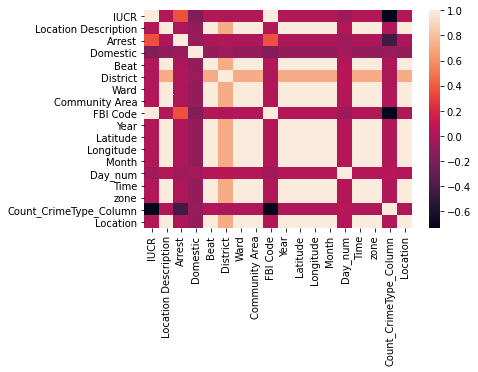

In [67]:
sns.heatmap(corelation)

In [68]:
selected_columns = ['District','IUCR','Community Area','Latitude','Longitude','Month','Year','Time','zone','Location Description','FBI Code']

In [69]:
from sklearn.model_selection import train_test_split
X_train_gs, X_test, y_train_gs, y_test = train_test_split(data[selected_columns], data['primary_type_grouped'], test_size=0.2) # 80% training and 20% test

In [70]:
knn_5 = KNeighborsClassifier(n_neighbors=5) 
knn_5.fit(X_train_gs,y_train_gs)
pred_train = knn_5.predict(X_train_gs)
pred_i = knn_5.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train_gs, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Test accuracy  0.92375
Accuracy  0.87
F1 score  0.8598031625041952


In [71]:
error_rate = []

krange = range(10,50,5)
for i in krange:
 
 knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights = 'uniform',n_jobs= -1) # haversine - if only lat long
 knn.fit(X_train_gs,y_train_gs)
 pred_train = knn.predict(X_train_gs)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
 print('Neighbours ',i)
 print('Test accuracy ', metrics.accuracy_score(y_train_gs, pred_train))
 print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
 print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Neighbours  10
Test accuracy  0.8925
Accuracy  0.84
F1 score  0.8207633190996887
Neighbours  15
Test accuracy  0.885
Accuracy  0.815
F1 score  0.7975028703256613
Neighbours  20
Test accuracy  0.87
Accuracy  0.81
F1 score  0.7930223483925047
Neighbours  25
Test accuracy  0.84625
Accuracy  0.8
F1 score  0.782908957529019
Neighbours  30
Test accuracy  0.8375
Accuracy  0.785
F1 score  0.7664325390872421
Neighbours  35
Test accuracy  0.81875
Accuracy  0.78
F1 score  0.7602191642395213
Neighbours  40
Test accuracy  0.8025
Accuracy  0.75
F1 score  0.7281866519985332
Neighbours  45
Test accuracy  0.79375
Accuracy  0.745
F1 score  0.7190156695156695


Text(0, 0.5, 'Error Rate')

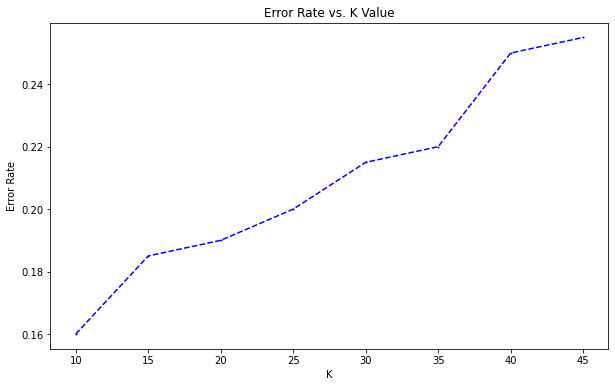

In [72]:
plt.figure(figsize=(10,6))

plt.plot(krange,error_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [73]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [74]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [75]:
grid_params = {
    'weights' : ['uniform', 'distance'],
    'metric' : ['manhattan','jaccard'] #haversine - if only lat long
}

In [76]:
randomSearch = RandomizedSearchCV(
    KNeighborsClassifier(25),
    grid_params,
    verbose = 1,
    cv =3,
    random_state = 123
    )

In [77]:
rs_results = randomSearch.fit(X_train_gs, y_train_gs)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


In [78]:
rs_results.best_score_

0.8637699116705622

In [79]:
rs_results.best_params_

{'metric': 'manhattan', 'weights': 'distance'}

In [80]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [81]:
# Oversample 'Majority'
sm = SMOTE('minority', random_state=123)

In [82]:
X_train_res, y_train_res = sm.fit_sample(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [83]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_train_res, columns= selected_columns)
y_train_updated = pd.Series(y_train_res)

In [84]:
target_counts = y_train_updated.value_counts()
target_counts

THEFT                        305
HUMAN_TRAFFICKING_OFFENSE    305
NON-CRIMINAL_ASSAULT         190
CRIMINAL_OFFENSE             126
NARCOTIC_OFFENSE              80
OTHER_OFFENSE                 70
SEXUAL_OFFENSE                13
WEAPONS_OFFENSE                9
dtype: int64

In [85]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [86]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [87]:
pred_i = knn.predict(X_test)

In [88]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.76
F1 score  0.7684423320937981


In [89]:
from imblearn.under_sampling import ClusterCentroids

In [90]:
# Undersample 'Majority'
cc = ClusterCentroids(sampling_strategy = 'majority')

In [91]:
X_cc, y_cc = cc.fit_sample(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [92]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_cc, columns= selected_columns)
y_train_updated = pd.Series(y_cc)

In [93]:
target_counts = y_train_updated.value_counts()
target_counts

NON-CRIMINAL_ASSAULT         190
CRIMINAL_OFFENSE             126
NARCOTIC_OFFENSE              80
OTHER_OFFENSE                 70
SEXUAL_OFFENSE                13
WEAPONS_OFFENSE                9
THEFT                          7
HUMAN_TRAFFICKING_OFFENSE      7
dtype: int64

In [94]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [95]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [96]:
pred_i = knn.predict(X_test)

In [97]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.625
F1 score  0.5024442096867258


In [98]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [99]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy= 'minority')

In [100]:
# fit and apply the transform
X_random, y_random = over.fit_resample(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [101]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_random, columns= selected_columns)
y_train_updated = pd.Series(y_random)

In [102]:
target_counts_random = y_train_updated.value_counts()
target_counts_random

THEFT                        305
HUMAN_TRAFFICKING_OFFENSE    305
NON-CRIMINAL_ASSAULT         190
CRIMINAL_OFFENSE             126
NARCOTIC_OFFENSE              80
OTHER_OFFENSE                 70
SEXUAL_OFFENSE                13
WEAPONS_OFFENSE                9
dtype: int64

In [103]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [104]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [105]:
pred_i = knn.predict(X_test)

In [106]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.76
F1 score  0.7669423320937981


In [107]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy= 'majority')

In [108]:
# fit and apply the transform
X_train_updated, y_train_updated = under.fit_resample(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [109]:
y_train_updated = pd.Series(y_train_updated)
target_counts_random = y_train_gs.value_counts()
target_counts_random

THEFT                        305
NON-CRIMINAL_ASSAULT         190
CRIMINAL_OFFENSE             126
NARCOTIC_OFFENSE              80
OTHER_OFFENSE                 70
SEXUAL_OFFENSE                13
WEAPONS_OFFENSE                9
HUMAN_TRAFFICKING_OFFENSE      7
Name: primary_type_grouped, dtype: int64

In [110]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [111]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [112]:
pred_i = knn.predict(X_test)

In [113]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.625
F1 score  0.5024442096867258


In [114]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [115]:
#KNN with - 25 neighbours
knn = KNeighborsClassifier(25, metric='manhattan', weights = 'uniform',n_jobs= -1)

#random forest with 75 Decision Trees
rf = RandomForestClassifier(10, max_depth = 10, n_jobs= -1)

#Support Vector Classifier
svm = SVC(kernel = 'linear', random_state = 123, probability=True)

In [116]:
# can using previopusly trained KNN as well
knn.fit(X_train_gs,y_train_gs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')

In [117]:
rf.fit(X_train_gs,y_train_gs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [118]:
rf.score(X_test, y_test)

0.945

In [120]:
#create a dictionary of our models
estimators=[('knn', knn), ('rf', rf), ('svm', svm)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
ensemble

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='manhattan',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=25,
                                                   p=2, weights='uniform')),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=10,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
 